# <center >ANALYSIS OF AMERICAN UNIVERSITIES</center >
# <center >WHAT MAKES A STUDENT PREFER A UNIVERSITY?</center >

The aim of this project is to find out which are the most relevant features that students consider to choose the preferred American university. Some of the essential questions for developing this project are related to the number of applications, admissions, and enrollments, cost of tuition and fees, cost of living on campus, types of degrees offered, and features of the states where universities are located.

The dataset used for this analysis was taken from https://www.kaggle.com/datasets/sumithbhongale/american-university-data-ipeds-dataset/code. It contains a plethora of information about American universities (that are not necessarily the top 10-20) in 2013.

Although this dataset does not contain information about all the first-ranked American universities, the patterns and insights extracted from it are highly representative of the whole behavior.
The dataset contains more than a thousand rows (universities) and 145 columns (features about those universities). Several of those features are out of the scope of this project.  Only the features that have information to answer the questions to achieve the goal of the project were deployed.
The most powerful tools for data analysis used in this project are the packages `Numpy` and `Pandas`, and to visualize and explore the data: `Matplotlib` and `Seaborn`.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pickle
from pandas_profiling import ProfileReport

## 1) Reading Dataset

In [2]:
df1=pd.read_excel(r'E:\IPEDS_data.xlsx')
df1.head(10)

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN
5,100751,The University of Alabama,2013,35487-0166,Doctor's degree - research/scholarship and pro...,Tuscaloosa County,-87.545766,33.214400,Not applicable,Implied no,...,20.0,18.0,4.0,3.0,50.0,42.0,41.0,8.0,19469.0,NaN
6,100812,Athens State University,2013,35611,Bachelor's degree,Limestone County,-86.965140,34.805625,Not applicable,Implied no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,854.0,NaN
7,100830,Auburn University at Montgomery,2013,36117-3596,Doctor's degree - research/scholarship,Montgomery County,-86.177351,32.369939,Not applicable,Implied no,...,48.0,48.0,5.0,5.0,48.0,36.0,36.0,0.0,10736.0,NaN
8,100858,Auburn University,2013,36849,Doctor's degree - research/scholarship and pro...,Lee County,-85.492409,32.600201,Not applicable,Implied no,...,13.0,13.0,3.0,1.0,65.0,32.0,31.0,3.0,22092.0,NaN
9,100937,Birmingham Southern College,2013,35254,Bachelor's degree,Jefferson County,-86.853636,33.515453,United Methodist,Implied no,...,21.0,21.0,9.0,26.0,96.0,80.0,80.0,7.0,NaN,37598.0


# Summary

### 1) This Whole Dataset is For 2013 Only.
### 2) The Dataset Have 1534 Rows And 145 Columns.
### 3) Some Features Regarding University Name And Address Details.
### 4) Some Percentage of Percent Receiving Different types of Grants.
### 5) Some Features Regarding offers Degrees.(Bachelor/Masters)
### 6) Some Features of Pass SAT,ACT Exams With Subjects.
### 7) Some Columns Regarding Tuition And Fees and Full-time, Part-time UG Enrollment.
### 8) Columns Regarding Graduation Rate And Percent of first-time undergraduates.
### 9) Some columns Regarding in-State And Out -of-State Students.
### 10) Most of Columns has Float Type Values. (116 Columns)

In [3]:
df1.shape     # Rows And Columns

(1534, 145)

In [4]:
df1.columns

Index(['ID number', 'Name', 'year', 'ZIP code', 'Highest degree offered',
       'County name', 'Longitude location of institution',
       'Latitude location of institution', 'Religious affiliation',
       'Offers Less than one year certificate',
       ...
       'Percent of freshmen  receiving federal grant aid',
       'Percent of freshmen receiving Pell grants',
       'Percent of freshmen receiving other federal grant aid',
       'Percent of freshmen receiving state/local grant aid',
       'Percent of freshmen receiving institutional grant aid',
       'Percent of freshmen receiving student loan aid',
       'Percent of freshmen receiving federal student loans',
       'Percent of freshmen receiving other loan aid',
       'Endowment assets (year end) per FTE enrollment (GASB)',
       'Endowment assets (year end) per FTE enrollment (FASB)'],
      dtype='object', length=145)

Both Numeric and Categorical Columns 145 Columns.

In [5]:
df1.info(max_cols=len(df1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 145 columns):
 #    Column                                                                                  Non-Null Count  Dtype  
---   ------                                                                                  --------------  -----  
 0    ID number                                                                               1534 non-null   int64  
 1    Name                                                                                    1534 non-null   object 
 2    year                                                                                    1534 non-null   int64  
 3    ZIP code                                                                                1534 non-null   object 
 4    Highest degree offered                                                                  1534 non-null   object 
 5    County name                                                 

Information of all Dataset
#####  the column SAT Writing 75th percentile score, contain several null or NaN values.

## Separate Categorical And Numerical Column

In [6]:
categorical_columns = df1.select_dtypes(include=[np.object])
categorical_columns.columns

C:\Users\Richesh\AppData\Local\Temp\ipykernel_5036\4076242465.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_columns = df1.select_dtypes(include=[np.object])


Index(['Name', 'ZIP code', 'Highest degree offered', 'County name',
       'Religious affiliation', 'Offers Less than one year certificate',
       'Offers One but less than two years certificate',
       'Offers Associate's degree',
       'Offers Two but less than 4 years certificate',
       'Offers Bachelor's degree', 'Offers Postbaccalaureate certificate',
       'Offers Master's degree', 'Offers Post-master's certificate',
       'Offers Doctor's degree - research/scholarship',
       'Offers Doctor's degree - professional practice',
       'Offers Doctor's degree - other', 'Offers Other degree',
       'State abbreviation', 'FIPS state code', 'Geographic region',
       'Sector of institution', 'Level of institution',
       'Control of institution', 'Historically Black College or University',
       'Tribal college', 'Degree of urbanization (Urban-centric locale)',
       'Carnegie Classification 2010: Basic'],
      dtype='object')

In [7]:
numerical_columns = df1.select_dtypes(include=[np.number])    # Total 118 Column.
numerical_columns.columns

Index(['ID number', 'year', 'Longitude location of institution',
       'Latitude location of institution', 'Applicants total',
       'Admissions total', 'Enrolled total',
       'Percent of freshmen submitting SAT scores',
       'Percent of freshmen submitting ACT scores',
       'SAT Critical Reading 25th percentile score',
       ...
       'Percent of freshmen  receiving federal grant aid',
       'Percent of freshmen receiving Pell grants',
       'Percent of freshmen receiving other federal grant aid',
       'Percent of freshmen receiving state/local grant aid',
       'Percent of freshmen receiving institutional grant aid',
       'Percent of freshmen receiving student loan aid',
       'Percent of freshmen receiving federal student loans',
       'Percent of freshmen receiving other loan aid',
       'Endowment assets (year end) per FTE enrollment (GASB)',
       'Endowment assets (year end) per FTE enrollment (FASB)'],
      dtype='object', length=118)

In [8]:
int= df1.select_dtypes(include=['int64'])     # Total 2 Int Column.
int.columns

Index(['ID number', 'year'], dtype='object')

In [9]:
float= df1.select_dtypes(include=['float64']) # Total 118 Float Column.
float.columns

Index(['Longitude location of institution', 'Latitude location of institution',
       'Applicants total', 'Admissions total', 'Enrolled total',
       'Percent of freshmen submitting SAT scores',
       'Percent of freshmen submitting ACT scores',
       'SAT Critical Reading 25th percentile score',
       'SAT Critical Reading 75th percentile score',
       'SAT Math 25th percentile score',
       ...
       'Percent of freshmen  receiving federal grant aid',
       'Percent of freshmen receiving Pell grants',
       'Percent of freshmen receiving other federal grant aid',
       'Percent of freshmen receiving state/local grant aid',
       'Percent of freshmen receiving institutional grant aid',
       'Percent of freshmen receiving student loan aid',
       'Percent of freshmen receiving federal student loans',
       'Percent of freshmen receiving other loan aid',
       'Endowment assets (year end) per FTE enrollment (GASB)',
       'Endowment assets (year end) per FTE enrollment

## On The Above Observation datatype of 2 features are the integers and remaining 116 are the Floats and 27 are the Object.

# How much mising Values in each Column

In [10]:
df1.isna().sum().sort_values(ascending=False)

Endowment assets (year end) per FTE enrollment (GASB)      1018
SAT Writing 25th percentile score                           820
SAT Writing 75th percentile score                           820
Number of first-time undergraduates - foreign countries     623
Percent of first-time undergraduates - out-of-state         623
                                                           ... 
Level of institution                                          0
Control of institution                                        0
Historically Black College or University                      0
Tribal college                                                0
State abbreviation                                            0
Length: 145, dtype: int64

In [11]:
Percent_Nan=df1.isnull().sum()/len(df1)*100
Percent_Nan.sort_values(ascending=False)

Endowment assets (year end) per FTE enrollment (GASB)      66.362451
SAT Writing 25th percentile score                          53.455020
SAT Writing 75th percentile score                          53.455020
Number of first-time undergraduates - foreign countries    40.612777
Percent of first-time undergraduates - out-of-state        40.612777
                                                             ...    
Level of institution                                        0.000000
Control of institution                                      0.000000
Historically Black College or University                    0.000000
Tribal college                                              0.000000
State abbreviation                                          0.000000
Length: 145, dtype: float64

on the Above observation most of Columns has The Missing Values Greater Than 10,20

## How Much Missing Values Columns More Than 5%

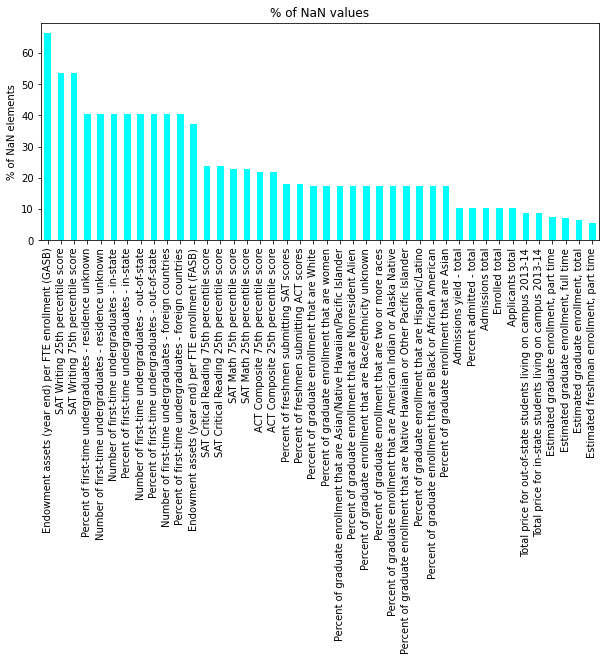

In [12]:
a=Percent_Nan[Percent_Nan>=5].sort_values(ascending=False).plot.bar(title='% of NaN values',figsize=(10,4),color='cyan');
a.set_ylabel('% of NaN elements');

In [13]:
a=Percent_Nan[Percent_Nan>=0.001].count()
print(a)
b=Percent_Nan[Percent_Nan>=1].count()
print(b)
c=Percent_Nan[Percent_Nan>=5].count()
print(c)
d=Percent_Nan[Percent_Nan>=10].count()
print(d)

127
62
42
36


#####  Many Missing Values Columns More Than 5% is 42 & 1% is 62 and 0.1% is 127  

## 2) Data Preparation: Cleaning

Now, some rows that contain a plethora of NaN values will also been removed

In [14]:
df1[df1['Total enrollment'].isna()][['Name','Applicants total','Admissions total','Enrolled total','Total enrollment']]

,Name,Applicants total,Admissions total,Enrolled total,Total enrollment
257,University of North Georgia,NaN,NaN,NaN,NaN
1308,Texas A & M University-Galveston,NaN,NaN,NaN,NaN


In [15]:
a=df1[df1['Name']=='University of North Georgia'].index[0]
b=df1[df1['Name']=='Texas A & M University-Galveston'].index[0]
df1.drop([a,b],axis=0,inplace=True)

In [16]:
df1.shape

(1532, 145)

#### From the remaining columns, only those that are related to the goal of this project will be selected to continue working on them.

In [17]:
interesting_columns=['Name', 'year', 'Highest degree offered', "Offers Bachelor's degree",
       "Offers Master's degree",
       "Offers Doctor's degree - research/scholarship",
       "Offers Doctor's degree - professional practice", 'Applicants total',
       'Admissions total', 'Enrolled total', 'Estimated enrollment, total',
       'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'State abbreviation', 'Control of institution', 'Total enrollment',
       'Full-time enrollment', 'Part-time enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Percent of graduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 years, total',
       'Graduation rate - Bachelor degree within 5 years, total',
       'Graduation rate - Bachelor degree within 6 years, total','SAT Critical Reading 25th percentile score','SAT Critical Reading 75th percentile score','SAT Math 25th percentile score','SAT Math 75th percentile score','SAT Writing 25th percentile score','SAT Writing 75th percentile score','ACT Composite 25th percentile score','ACT Composite 75th percentile score' ]

In [18]:
df=df1[interesting_columns]

### In the 'interested_columns' list that columns are related to Goal. And Remaining are not needed.

In [19]:
df.shape

(1532, 37)

In [20]:
a=df.isnull().sum()/len(df)*100
a.sort_values(ascending=False)

SAT Writing 75th percentile score                                 53.394256
SAT Writing 25th percentile score                                 53.394256
SAT Critical Reading 75th percentile score                        23.694517
SAT Critical Reading 25th percentile score                        23.694517
SAT Math 25th percentile score                                    22.845953
SAT Math 75th percentile score                                    22.845953
ACT Composite 75th percentile score                               21.736292
ACT Composite 25th percentile score                               21.736292
Percent of graduate enrollment that are women                     17.167102
Applicants total                                                  10.117493
Admissions total                                                  10.117493
Enrolled total                                                    10.117493
Total price for in-state students living on campus 2013-14         8.616188
Total price 

In [21]:
df.describe()

,year,Applicants total,Admissions total,Enrolled total,"Estimated enrollment, total","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,Total enrollment,Full-time enrollment,...,"Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total",SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,SAT Writing 25th percentile score,SAT Writing 75th percentile score,ACT Composite 25th percentile score,ACT Composite 75th percentile score
count,1532.0,1377.000000,1377.000000,1377.000000,1532.000000,1497.000000,1400.000000,1400.000000,1532.000000,1532.000000,...,1476.000000,1476.000000,1169.000000,1169.000000,1182.000000,1182.000000,714.000000,714.000000,1199.000000,1199.000000
mean,2013.0,6391.193174,3554.880174,1043.046478,7033.115535,20727.490314,34935.306429,38767.612857,7070.114230,5371.494125,...,49.788618,53.189024,470.340462,578.297690,480.514382,588.311337,470.931373,576.550420,20.582152,25.572143
std,0.0,8787.469171,4309.457606,1285.165519,9387.648898,12455.805360,13283.049319,10716.524007,9416.538854,7474.494963,...,20.256726,19.102511,68.368390,70.169391,72.464475,71.871189,79.670620,78.899075,3.477768,3.375932
min,2013.0,0.000000,0.000000,0.000000,68.000000,1032.000000,9768.000000,9768.000000,66.000000,0.000000,...,0.000000,0.000000,310.000000,360.000000,280.000000,410.000000,310.000000,360.000000,13.000000,14.000000
25%,2013.0,1488.000000,950.000000,287.000000,1497.250000,8542.000000,22487.000000,31128.000000,1512.750000,1199.000000,...,36.000000,40.000000,430.000000,530.000000,430.000000,540.000000,416.250000,520.000000,18.000000,23.000000
50%,2013.0,3350.000000,2056.000000,538.000000,3126.000000,20060.000000,34115.000000,37193.500000,3127.000000,2328.000000,...,49.000000,52.500000,460.000000,570.000000,470.000000,580.000000,450.000000,566.500000,20.000000,25.000000
75%,2013.0,7016.000000,4203.000000,1246.000000,8376.000000,29992.000000,44835.750000,45907.500000,8376.250000,6080.750000,...,63.000000,66.000000,500.000000,620.000000,510.000000,630.000000,510.000000,620.000000,22.000000,27.000000
max,2013.0,72676.000000,35815.000000,10241.000000,79576.000000,49138.000000,64988.000000,64988.000000,77338.000000,50012.000000,...,100.000000,100.000000,720.000000,800.000000,770.000000,800.000000,720.000000,800.000000,33.000000,35.000000


## For Making Model First of All You have to Do Missing Value Treatment.
## I Didn't do Because i am Only Doing EDA.

# Project Report

In [22]:
pf = ProfileReport(df, title="Pandas Profiling Report")

In [23]:
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
pf.to_file('AmericanUniversityReport.html')

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 3) Exploratory Data Analysis (EDA) and Visualization.

### Q: Check Correlation Between  Applicants Total, Admissions Total and Enrolled Total 

<AxesSubplot:>

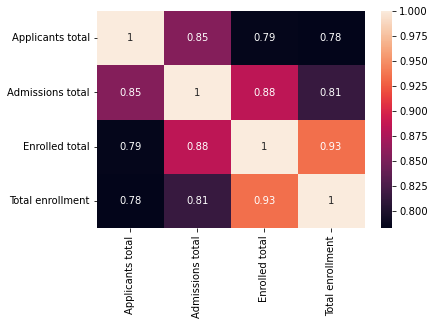

In [25]:
c=df[['Applicants total','Admissions total','Enrolled total','Total enrollment']]
sns.heatmap(c.corr(),annot=True)

### on the Chart understand that Applicants>admission>enrolled>enrollment

Text(0, 0.5, 'Applicants total')

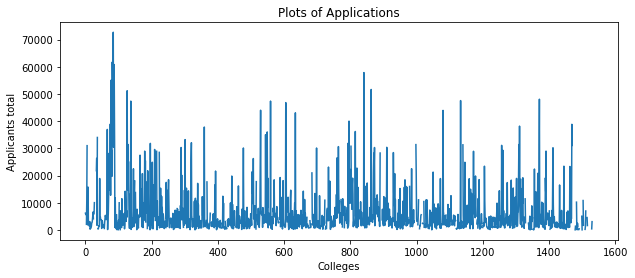

In [26]:
plt.figure(figsize=(10,4))
plt.title('Plots of Applications')
plt.plot(df.index,df['Applicants total'])
plt.xlabel('Colleges')
plt.ylabel('Applicants total')

<AxesSubplot:xlabel='Enrolled total', ylabel='Admissions total'>

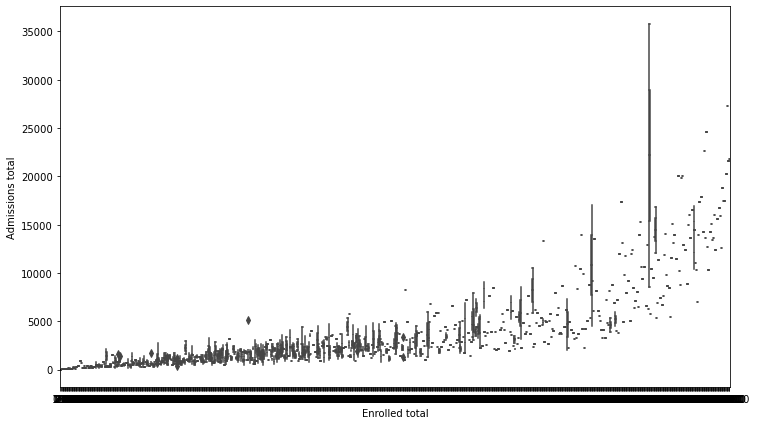

In [27]:
plt.figure(figsize=(12,7))
sns.boxplot(x=df['Enrolled total'],y=df['Admissions total'],data=df)

On The observation Day by Day Enrollment rate increase. if student has to enrolled in university then the Admission is mendetory in College otherwise student can't enrolled.

C:\Users\Richesh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Richesh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Richesh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 65.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Richesh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 42.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Richesh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.1% of 

<AxesSubplot:xlabel='Admissions total', ylabel='Highest degree offered'>

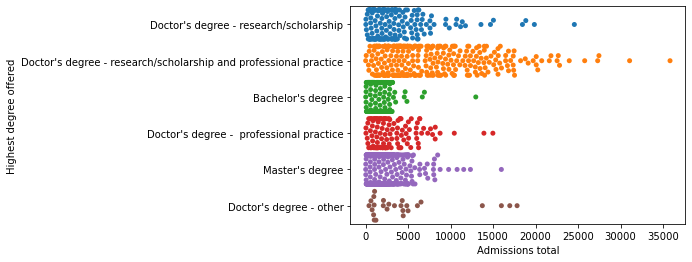

In [28]:
sns.swarmplot(x=df['Admissions total'],y=df['Highest degree offered'])

On The Observation for the degree of 'Doctor's degree- Research/scholarship' Admissions is  more means Between 15000 to 20000

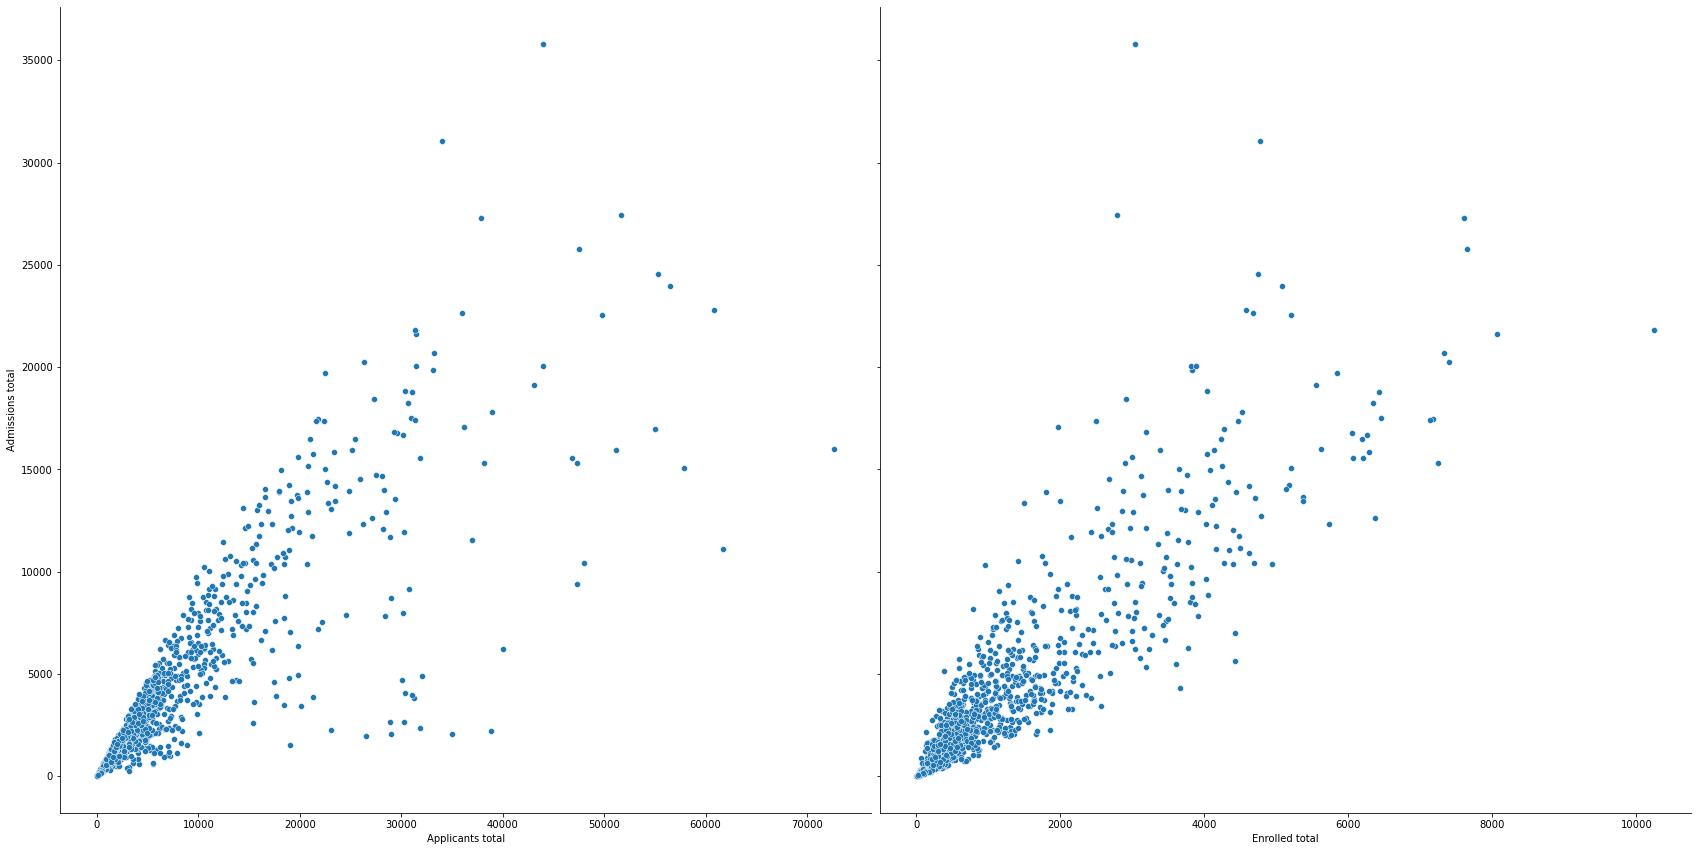

In [29]:
sns.pairplot(df, x_vars=['Applicants total', 'Enrolled total'], y_vars='Admissions total', height=12, aspect=1, kind='scatter')
plt.show()

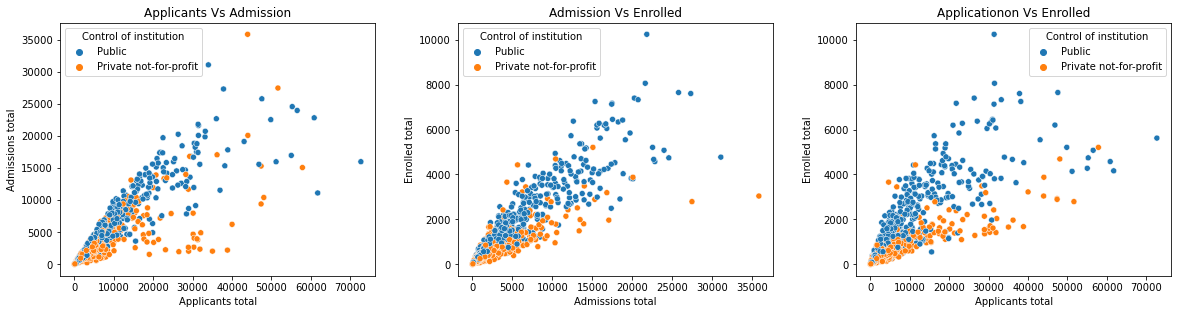

In [30]:
plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
sns.scatterplot(x="Applicants total",y='Admissions total',data=df,hue='Control of institution')
plt.title('Applicants Vs Admission')
plt.subplot(1,3,2)
sns.scatterplot(x='Admissions total',y='Enrolled total',data=df,hue='Control of institution')
plt.title('Admission Vs Enrolled')
plt.subplot(1,3,3)
sns.scatterplot(x="Applicants total",y='Enrolled total',data=df,hue='Control of institution')
plt.title('Applicationon Vs Enrolled')
plt.tight_layout(pad=3)

#####  Relation Between Two Tables:-
#### 1) In the First Chart Applicants Increase then Admission Also Increase means Admission depends on Applicants.
#### 2) In the Second chart Admission Increase Enrolled also increase means Enrolled total is also a dependent Variable
#### 3) In Third Chart when will More Applications then we can Think About Enrollement Process. Student Can Applicants in Many Colleges But Takes Admission in only one College.

When The Applications Increase then Admissions also increase but applicants only prefer one university/college. admissions is less than Applications and Enrolled also less than Admissions. 

## SAT Exam Percentile Scores And Those Ready For bachelor/other Education

C:\Users\Richesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Richesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Reading Marks 75 %')

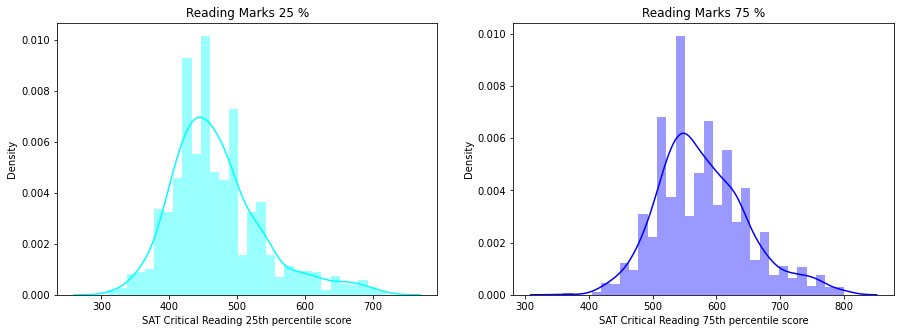

In [31]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['SAT Critical Reading 25th percentile score'], kde = True, color ='cyan', bins = 30)
plt.title('Reading Marks 25 %')
plt.subplot(1,2,2)
sns.distplot(df['SAT Critical Reading 75th percentile score'], kde = True, color ='Blue', bins = 30)
plt.title('Reading Marks 75 %')

Distribution Plot For Reading Many of Student Not better in Reading But, they Pass Exam

C:\Users\Richesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Richesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


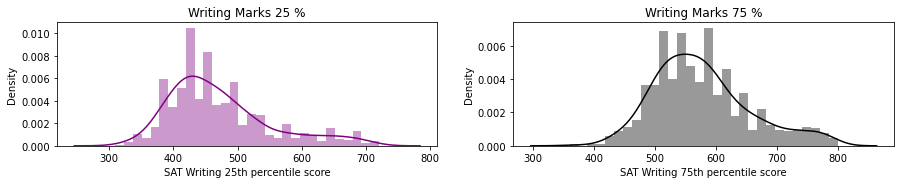

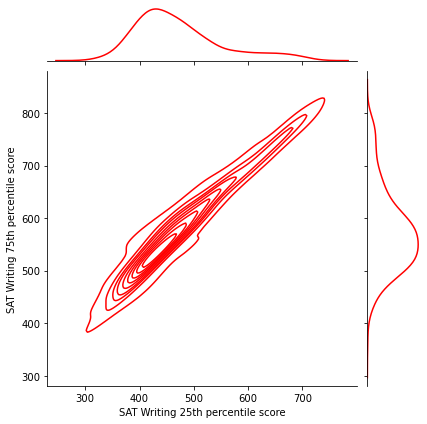

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
sns.distplot(df['SAT Writing 25th percentile score'], kde = True, color ='Purple', bins = 30)
plt.title('Writing Marks 25 %')
plt.subplot(2,2,2)
sns.distplot(df['SAT Writing 75th percentile score'], kde = True, color ='k', bins = 30)
plt.title('Writing Marks 75 %')
sns.jointplot(x ='SAT Writing 25th percentile score', y ='SAT Writing 75th percentile score', data = df,kind='kde',color='r')

#### It is plot of two variables with bivariate and univariate graphs. It basically combines two different plots.
##### Distribution Plot For writing Many of Student Not better in Writing But, Those student Write Paper.

C:\Users\Richesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Richesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Math Marks 75 %')

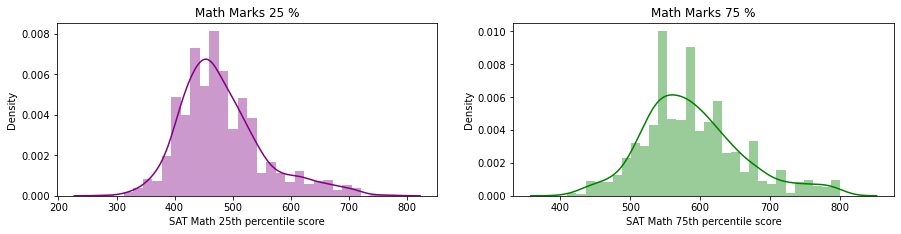

In [33]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.distplot(df['SAT Math 25th percentile score'], kde = True, color ='Purple', bins = 30)
plt.title('Math Marks 25 %')
plt.subplot(2,2,2)
sns.distplot(df['SAT Math 75th percentile score'], kde = True, color ='g', bins = 30)
plt.title('Math Marks 75 %')

Math Students Score Not Better But, Good

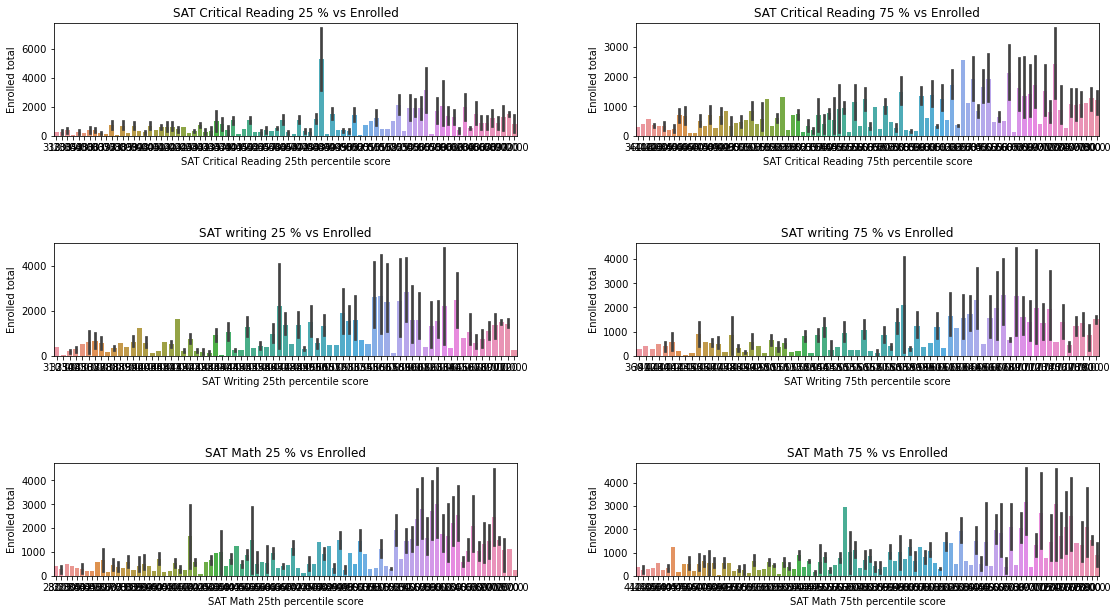

In [34]:
plt.figure(figsize=(17,10))
plt.subplot(3,2,1)
sns.barplot(x="SAT Critical Reading 25th percentile score",y='Enrolled total',data=df)
plt.title('SAT Critical Reading 25 % vs Enrolled')
plt.subplot(3,2,2)
sns.barplot(x='SAT Critical Reading 75th percentile score',y='Enrolled total',data=df)
plt.title('SAT Critical Reading 75 % vs Enrolled')
plt.subplot(3,2,3)
sns.barplot(x="SAT Writing 25th percentile score",y='Enrolled total',data=df)
plt.title('SAT writing 25 % vs Enrolled')
plt.subplot(3,2,4)
sns.barplot(x='SAT Writing 75th percentile score',y='Enrolled total',data=df)
plt.title('SAT writing 75 % vs Enrolled')
plt.subplot(3,2,5)
sns.barplot(x="SAT Math 25th percentile score",y='Enrolled total',data=df)
plt.title('SAT Math 25 % vs Enrolled')
plt.subplot(3,2,6)
sns.barplot(x='SAT Math 75th percentile score',y='Enrolled total',data=df)
plt.title('SAT Math 75 % vs Enrolled')
plt.tight_layout(pad=6)

#### 1) Here Most of Student in SAT exam Not Better % in reading but have registered for courses in the University. May be There are Talent in Math Can't Say (1169 Students)
#### 2) In the Sencond Chart most of Students is Better in Reading. (1169 Students)
#### 3) in the third Chart most of Student didnt get better marks in writing May be They will Lazy. (714 students)
#### 4) In the fourth Chart Most of Student that Gives Better Marks (714 Students)
#### 5) In the fifth Chart Most of Student not talent in math But they Also registerd of its Bachelor/other Education.(1182 students)
#### 6) In the sixth Chart Most of Student talent in math and they Also registerd of its Bachelor/other Education.(1182 students)

## ACT Exam Percentile Scores And Those Ready For bachelor/other Education

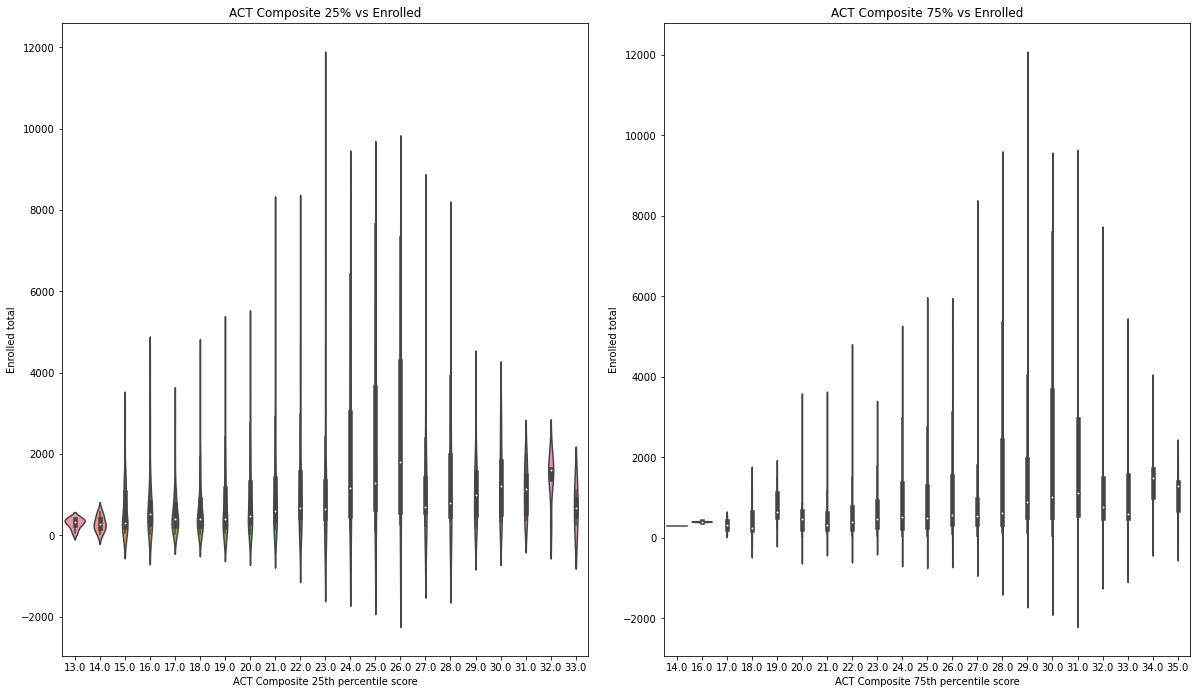

In [35]:
plt.figure(figsize=(17,10))
plt.subplot(1,2,1)
sns.violinplot(x="ACT Composite 25th percentile score",y='Enrolled total',data=df)
plt.title('ACT Composite 25% vs Enrolled')
plt.subplot(1,2,2)
sns.violinplot(x="ACT Composite 75th percentile score",y='Enrolled total',data=df)
plt.title('ACT Composite 75% vs Enrolled')
plt.tight_layout(pad=2)

In the first Chart most of Students is Better in Act Composite 25% (1199 Students). 75% not Better But Good. May be ACT Exam is Hard than SAT Exam

### Q: Which Highest Degree Was most Admissions for ?

Text(0.5, 1.0, 'Admissions total')

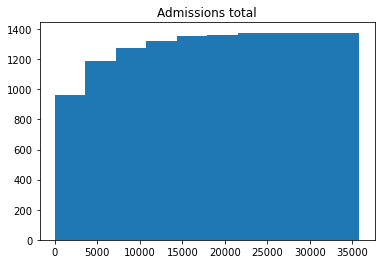

In [36]:
plt.hist(df['Admissions total'],cumulative=True)
plt.title("Admissions total")

<AxesSubplot:xlabel='Admissions total', ylabel='Highest degree offered'>

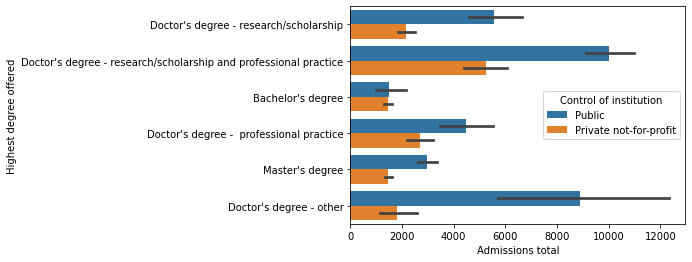

In [37]:
sns.barplot(y='Highest degree offered',x='Admissions total',data=df,hue='Control of institution')

<AxesSubplot:xlabel='Enrolled total', ylabel='Highest degree offered'>

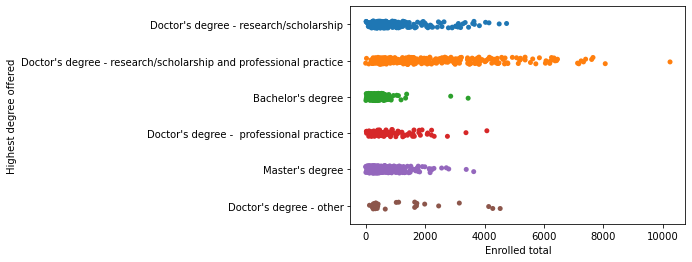

In [38]:
sns.stripplot(x=df['Enrolled total'],y=df['Highest degree offered'])

In 2013 most of admission in 'Doctors degree - research/scholarship and professional practice' Private nearby greater Than 4500 and Public Nearby 10000 And Total Enrolled is Nearby 8000.

### Q: Which College Has More than 15000 Admissions ?

In [39]:
a=df['Admissions total'].sort_values(ascending=False)
a

1080    35815.0
36      31057.0
863     27449.0
359     27300.0
1133    25772.0
         ...   
1526        NaN
1527        NaN
1528        NaN
1531        NaN
1533        NaN
Name: Admissions total, Length: 1532, dtype: float64

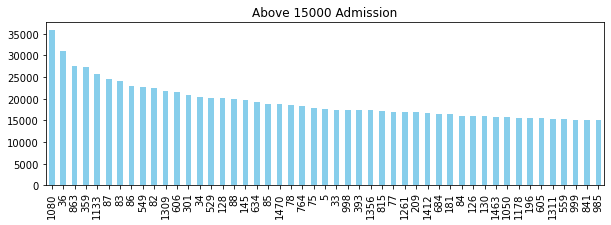

In [40]:
b=a[a>=15000].sort_values(ascending=False).plot.bar(title='Above 15000 Admission',figsize=(10,3),color='Skyblue');

In [41]:
b=a[a>=15000].count()
b

49

Here Are 49 Colleges has More Than 15000 Admissions

In [42]:
a=df['Enrolled total'].sort_values(ascending=False)
a

1309    10241.0
606      8061.0
1133     7649.0
359      7604.0
34       7401.0
         ...   
1526        NaN
1527        NaN
1528        NaN
1531        NaN
1533        NaN
Name: Enrolled total, Length: 1532, dtype: float64

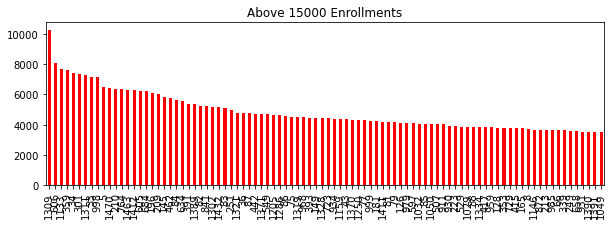

In [43]:
c=a[a>=3500].sort_values(ascending=False).plot.bar(title='Above 15000 Enrollments',figsize=(10,3),color='red');

In [44]:
b=a[a>=7000].count()
b

9

Admission Greater than 15000 Most of 49 Colleges but Enrollments greter than 15000 is 0 and greater than 7000 is only 9 is very Bad.Means it take admissions but not enrolled for courses.

### Q: Which 10 Universities were Most Admissions and Applications ?

In [45]:
c=df[['Name','Admissions total']].sort_values('Admissions total',ascending=False).head(10)

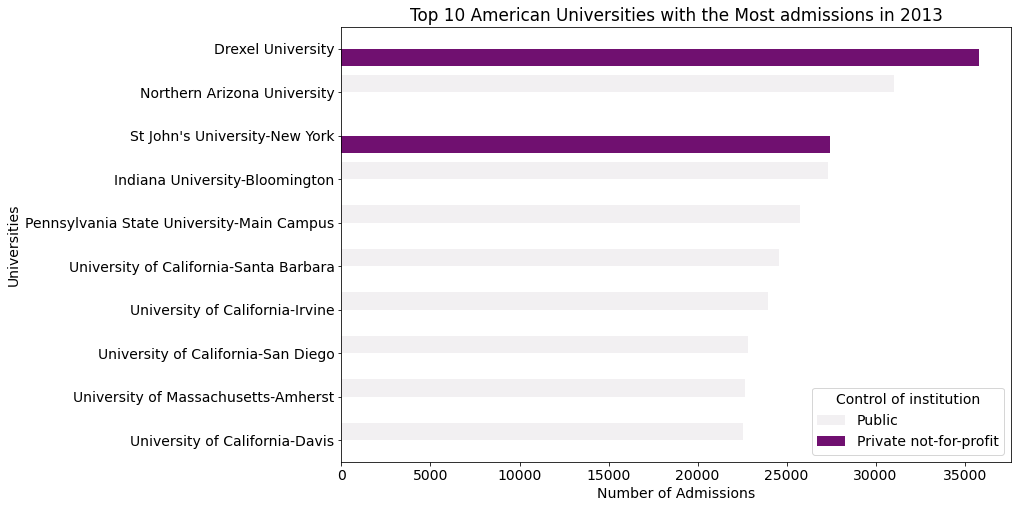

In [46]:
plt.figure(figsize=(12,8))
matplotlib.rcParams['font.size']=14
sns.barplot(x='Admissions total',y='Name',data=c,color='Purple',hue=df['Control of institution'])
plt.title('Top 10 American Universities with the Most admissions in 2013')
plt.xlabel('Number of Admissions')
plt.ylabel('Universities');

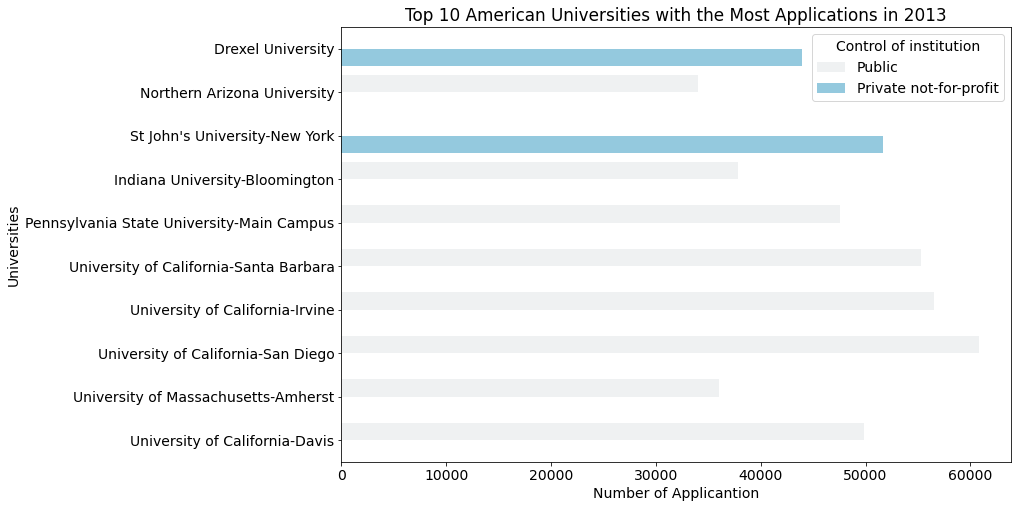

In [47]:
plt.figure(figsize=(12,8))
matplotlib.rcParams['font.size']=14
sns.barplot(x=df['Applicants total'],y='Name',data=c,color='Skyblue',hue=df['Control of institution'])
plt.title('Top 10 American Universities with the Most Applications in 2013')
plt.xlabel('Number of Applicantion')
plt.ylabel('Universities');

#### This Are the Top 10 Famous Universities And 1st Number University is "Drexel University" has more than 35000 Admissions but its applications is 45000 Nearby and its indexing Number is 1080 and But its Enrollment status is very very Bad less than 4000 enrollment total & Acceptance Rate is 77.77 This is The Private University.
#### And in the Public Sector 'University of California-San Diego' has More Applications nearby 61000 and Admission 23000 Then Acceptance Rate is -37.66 is very Bad in Public Sector.

### Q: Do students prefer universities with low tuition and fees?

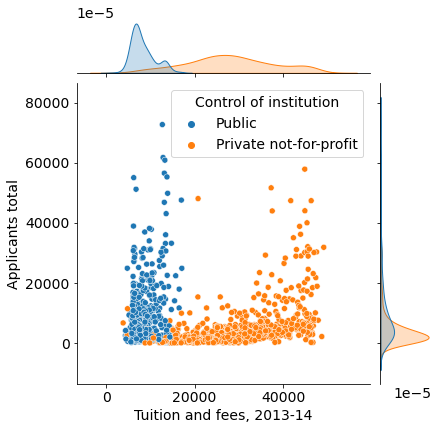

In [48]:
sns.jointplot(x='Tuition and fees, 2013-14',y='Applicants total',hue='Control of institution',data=df);

Looking at the figure above, we find that the most affordable universities receive the highest number of applications. This could make us think that there could be a relationship between the tuition and fees and the students' preference;however, we could endeavor to find a definite conclusion by analyzing tuition and fees and enrollment rates.

In [49]:
df['Enrollment rate']=(df['Enrolled total']/df['Admissions total']*100).round(2)

C:\Users\Richesh\AppData\Local\Temp\ipykernel_2272\1730164288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Enrollment rate']=(df['Enrolled total']/df['Admissions total']*100).round(2)


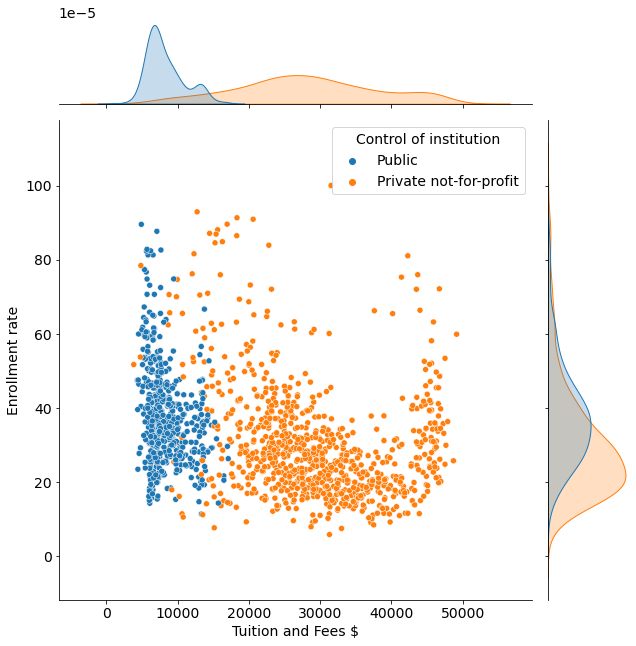

In [50]:
g=sns.jointplot(x='Tuition and fees, 2013-14',y='Enrollment rate',hue='Control of institution',height=9,data=df);
g=(g.set_axis_labels('Tuition and Fees $','Enrollment rate'))

This figure shows us two main ideas. The first one is that public universities are more affordable than the majority of private universities. Second, there is a higher concentration from the middle to the left. If we look at the enrollment rate in this figure's region, we can see that affordable universities have higher enrollment rates than those of the most expensive universities. ***This leads us to think that, when it comes to tuition and fees, students prefer affordable universities.*** Additionally, if we remember the conclusion of the last finding of public universities then, now, we could say that ***we found the reason or one of the reasons for the students' preference for public universities. Public universities are much more affordable than the majority of private universities.***.

### Q: Find the acceptance and Enrollment rate

### The acceptance based on the number of applications & the enrollment rate on the number of admissions. 

In [51]:
df['Acceptance rate']=(df['Admissions total']/df['Applicants total']*100).round(2)

C:\Users\Richesh\AppData\Local\Temp\ipykernel_2272\4011728934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Acceptance rate']=(df['Admissions total']/df['Applicants total']*100).round(2)


<AxesSubplot:ylabel='Density'>

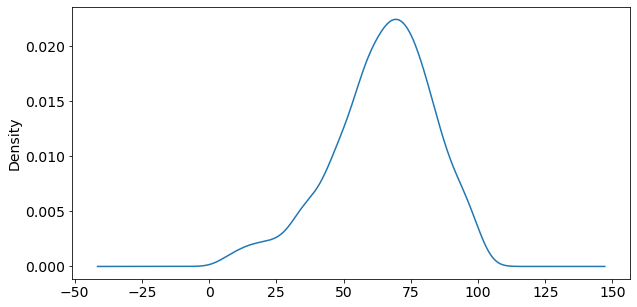

In [52]:
plt.figure(figsize=(10,5))
df['Acceptance rate'].plot(kind='density')

## Higesh 73% Acceptance Rate of Universities which is Very Highest. 

In [53]:
df['Enrollment rate']=(df['Enrolled total']/df['Admissions total']*100).round(2)

C:\Users\Richesh\AppData\Local\Temp\ipykernel_2272\1730164288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Enrollment rate']=(df['Enrolled total']/df['Admissions total']*100).round(2)


<AxesSubplot:xlabel='Enrollment rate', ylabel='Density'>

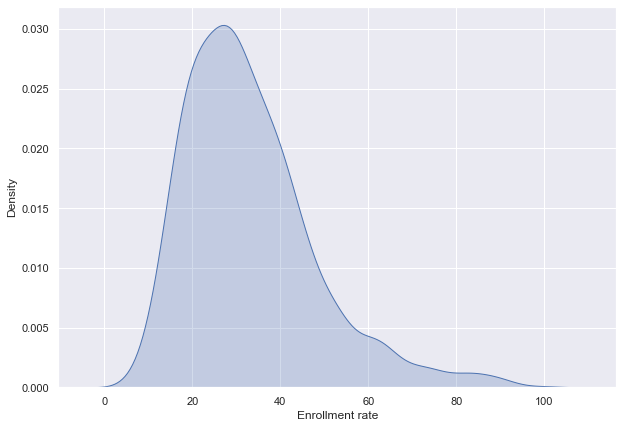

In [54]:
sns.set(rc={'figure.figsize':(10,7)})
sns.kdeplot(df['Enrollment rate'],shade=True)

## Highest 30% Enrollment Rate.

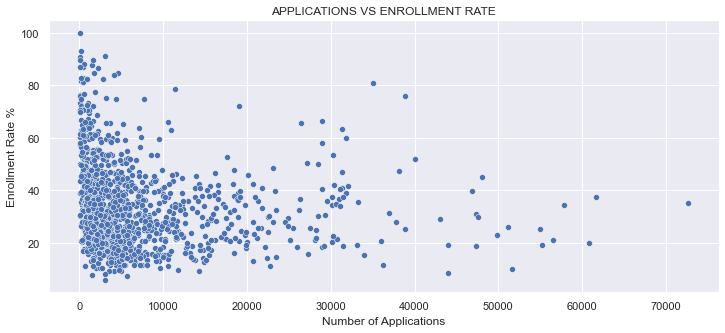

In [55]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Applicants total',y='Enrollment rate',data=df)
plt.title('APPLICATIONS VS ENROLLMENT RATE')
plt.ylabel('Enrollment Rate %')
plt.xlabel('Number of Applications');

Universities Receive lower no of Application With higher Enrollment rate.but there some exceptions,but this is the strongest tendency but we can say that high number of Applications doesn't Mean that university is preferred by students.

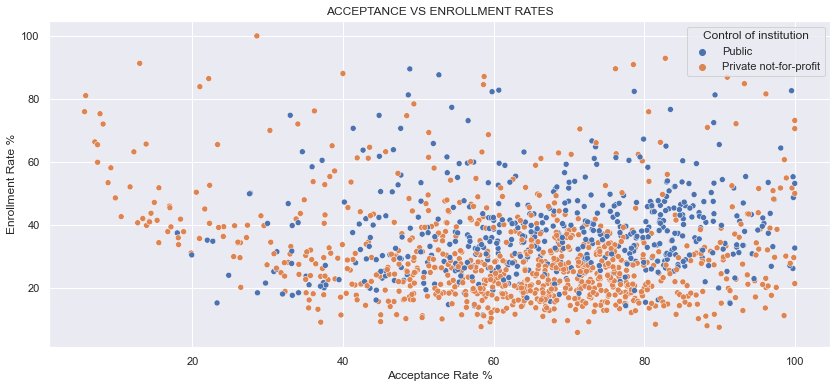

In [56]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='Acceptance rate',y='Enrollment rate',data=df,hue='Control of institution')
plt.title('ACCEPTANCE VS ENROLLMENT RATES')
plt.ylabel('Enrollment Rate %')
plt.xlabel('Acceptance Rate %');

here, high acceptance rates, the enrollment rate varies among public and private universities there is a higher concentration where the enrollment rate is not high and the lower acceptance rate and higher enrollment rate. Therefore, students do not prefer a university because of its high acceptance rate or because it is easier for students to be admitted to a university.

### Q: Do students prefer a university for its low cost of on-campus living?

Many students living out of campus because it gives other benefits therefore, some of them don't choose a university for a low cost of on-campus living.

The dataset contains two columns related to the cost of on-campus living. One column displays the cost for in-state students, the other one for out-state students.

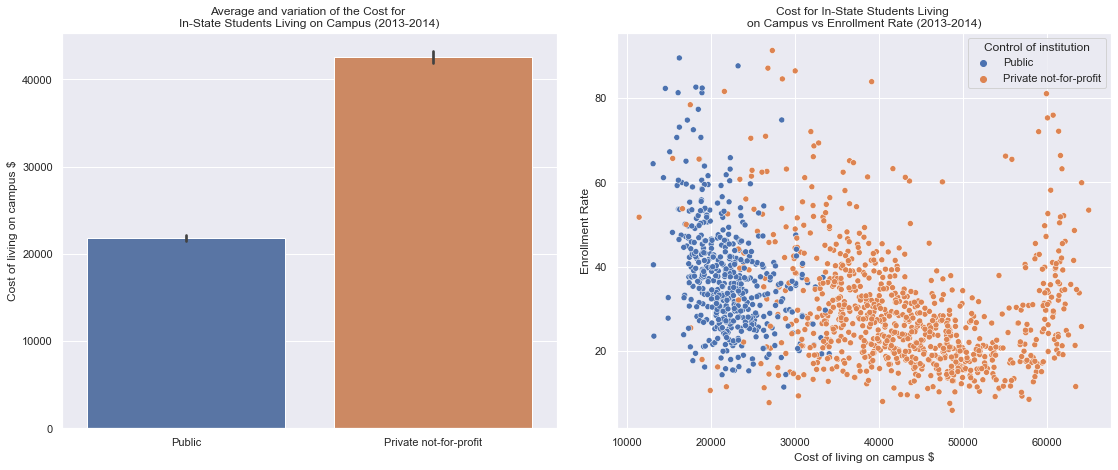

In [57]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.barplot(y=df['Total price for in-state students living on campus 2013-14'],x=df['Control of institution'])
plt.title('''Average and variation of the Cost for 
In-State Students Living on Campus (2013-2014)''')        
plt.xlabel('')
plt.ylabel('Cost of living on campus $')


plt.subplot(1,2,2)
sns.scatterplot(x=df['Total price for in-state students living on campus 2013-14'],y=df['Enrollment rate'],hue=df['Control of institution']);
plt.title('''Cost for In-State Students Living 
on Campus vs Enrollment Rate (2013-2014)''')
plt.xlabel('Cost of living on campus $')
plt.ylabel('Enrollment Rate')


plt.tight_layout(pad=2)

This figures show is that the majority of public universities offer a much more affordable cost for in-state students than private universities.the average cost in the case of public universities is half ofin the case of private universities.

Second,figure shows that high enrollment rates are more frequent when the cost is more affordable. This leads us to think that ***students look for universities that offer an affordable cost of living on campus for in-state students.***

### Q: Do students prefer a university based on the possibility of a higher, additional academic degree in the same university?

In [58]:
Hgdegrees=df['Highest degree offered'].value_counts()

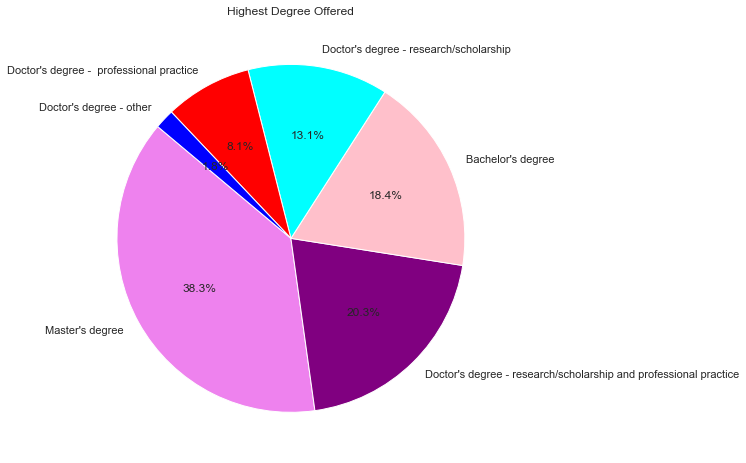

In [59]:
plt.figure(figsize=(16,8))
plt.pie(Hgdegrees,labels=Hgdegrees.index,
       autopct='%.1f%%',startangle=140,colors = ['violet','purple','pink','cyan','red','blue'])
plt.title('Highest Degree Offered');

The majority of universities offer up to a Master's degree. It's interesting to note that there is a high percentage of universities that offer only up to a Bachelor's degree.

C:\Users\Richesh\AppData\Local\Temp\ipykernel_2272\1753065692.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(('''Doctor's Degree:


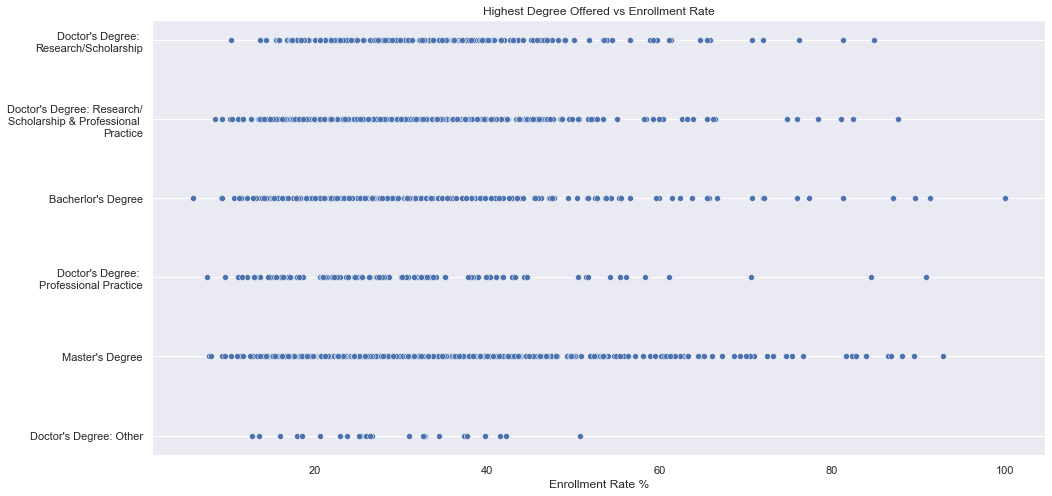

In [60]:
plt.figure(figsize=(16,8))
ax=sns.scatterplot(y='Highest degree offered',x='Enrollment rate',data=df);
plt.title('Highest Degree Offered vs Enrollment Rate')
plt.ylabel('')
plt.xlabel('Enrollment Rate %')
plt.grid(axis='x')
ax.set_yticklabels(('''Doctor's Degree: 
Research/Scholarship''',
                    '''Doctor's Degree: Research/
Scholarship & Professional 
Practice''',
                    "Bacherlor's Degree",
                    '''Doctor's Degree: 
Professional Practice''',
                    "Master's Degree",
                    "Doctor's Degree: Other"));

There are several Doctor's degrees offered, and even though we join them, still, the trend is that, more frequently, universities that offer up to a Bachelor's degree or a Master's degree have high enrollment rates. Therefore, we could think that ***students do not necessarily look for a university thinking about the possibility of continuing a next degree in the same university.***

### Q: Do students prefer universities from highly populated states?

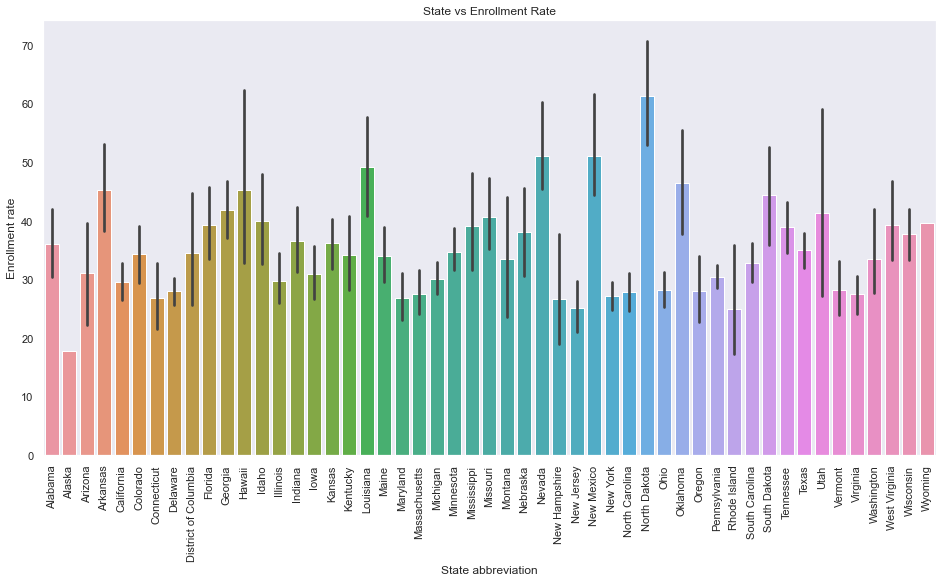

In [61]:
plt.figure(figsize=(16,8))
sns.barplot(x=df['State abbreviation'],y=df['Enrollment rate']);
plt.title('State vs Enrollment Rate')
plt.grid(axis='y')
plt.xticks(rotation=90);

There is a vast fluctuation in enrollment rate among universities of each state.can see that the highest average enrollment rate belongs to the state of North Dakota whereas, the lowest one belongs to Alaska.

## 4) Conclusion

#### 1) A high number of applications does not imply that a university is preferred among students.
#### 2) There is a strong students’ preference for public universities.
#### 3) Students, in general, prefer universities with affordable costs of on-campus living.
#### 4) Students do not necessarily prefer a university because of its high acceptance rate or, in other words, the students’ preference is not based on how easy it is for them to be admitted to a university.
#### 5) Two of the main reasons why public universities are preferred by students are: first, on average public universities present more affordable tuition and fees than private universities; second, public universities have more affordable on-campus living costs.
#### 6) When students look for a university to study for a Bachelor’s degree, they do not frequently choose the university thinking about a future possibility of pursuing a higher degree at the same university.

## 5) Future Work

#### 1) It could also be interesting to see if the preference of undergraduate students differs from that of graduate students: a master’s degree and a PhD.
#### 2) To get more accurate results, some additional information could be added, for example, information about other years, information about more American universities, and information about their ranking.
